# Exploring the Data Distribution

Each of the estimates sums up the data in a single number to describe
the location or variability of the data.\
It is also useful to explore how the data is distributed overall.


## Key Terms for Exploring the Distribution

- Boxplot
    A plot introduced by Tukey as a quick way to visualize the distribution of data.
        Synonym
            box and whiskers plot
- Frequency table
    A tally of the count of numeric data values that fall into a set of intervals (bins).
- Histogram
    A plot of the frequency table with the bins on the x-axis and the count (or pro‐
    portion) on the y-axis. While visually similar, bar charts should not be confused with histograms.
- Density plot
    A smoothed version of the histogram, often based on a kernel density estimate.


In [7]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib as plt 
import seaborn as sns
from tabulate import tabulate


In [2]:
# laod data
df = pd.read_csv('./data_sets/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Percentiles and Boxplots
Percentiles can be used to measure the spread of the data. Percentiles are also valuable for summarizing the entire distribution. It is common to report the quartiles (25th, 50th, and 75th per‐centiles) and the deciles (the 10th, 20th, …, 90th percentiles). Percentiles are especially valuable for summarizing the tails (the outer range) of the distribution. Popular culture has coined the term one-percenters to refer to the people in the top 99th percentile of wealth.

In [5]:
# get the 0.005,0.1,0.15,0.25,0.5,0.75,0.85,0.9,0.95 quantiles of df['charges']
df['charges'].quantile([0.005,0.1,0.15,0.25,0.5,0.75,0.85,0.9,0.95])

# print in tabulated form quantiles of df['charges'] with columns 
# as ['Quantile','Value']
quantiles = df['charges'].quantile([0.005,0.1,0.15,0.25,0.5,0.75,0.85,0.9,0.95])
quantiles = pd.DataFrame(quantiles)
quantiles.reset_index(inplace=True)
quantiles.columns = ['Quantile','Value']
print(quantiles)


   Quantile         Value
0     0.005   1145.110878
1     0.100   2346.533615
2     0.150   3171.836605
3     0.250   4740.287150
4     0.500   9382.033000
5     0.750  16639.912515
6     0.850  24990.166996
7     0.900  34831.719700
8     0.950  41181.827787


In [11]:
# print the table of quantiles in tabulated form with tabulate library
print(tabulate(quantiles, headers='keys', tablefmt='fancy_grid'))

╒════╤════════════╤══════════╕
│    │   Quantile │    Value │
╞════╪════════════╪══════════╡
│  0 │      0.005 │  1145.11 │
├────┼────────────┼──────────┤
│  1 │      0.1   │  2346.53 │
├────┼────────────┼──────────┤
│  2 │      0.15  │  3171.84 │
├────┼────────────┼──────────┤
│  3 │      0.25  │  4740.29 │
├────┼────────────┼──────────┤
│  4 │      0.5   │  9382.03 │
├────┼────────────┼──────────┤
│  5 │      0.75  │ 16639.9  │
├────┼────────────┼──────────┤
│  6 │      0.85  │ 24990.2  │
├────┼────────────┼──────────┤
│  7 │      0.9   │ 34831.7  │
├────┼────────────┼──────────┤
│  8 │      0.95  │ 41181.8  │
╘════╧════════════╧══════════╛


Boxplots, introduced by Tukey [Tukey-1977], are based on percentiles and give a
quick way to visualize the distribution of data

<Axes: ylabel='charges'>

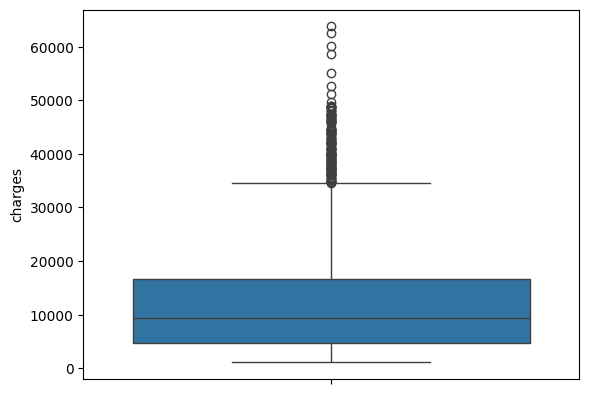

In [12]:
# plot boxplot of df['charges']
sns.boxplot(df['charges'])

<Axes: ylabel='age'>

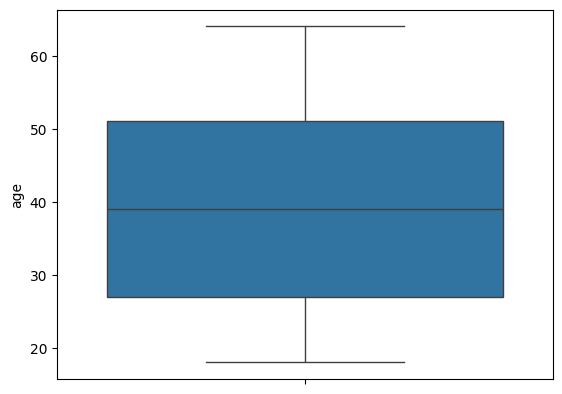

In [13]:
# plot boxplot of df['age'] 
sns.boxplot(df['age'])

<Axes: ylabel='bmi'>

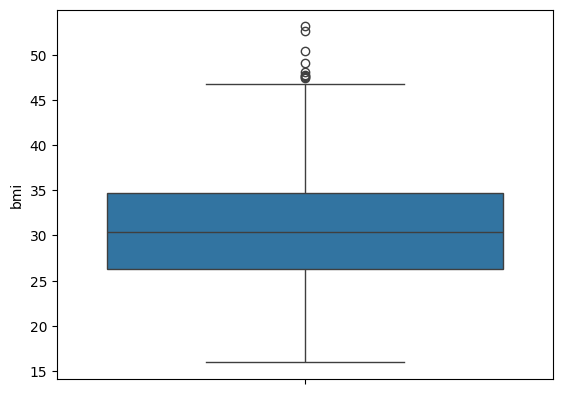

In [14]:
# plot boxplot of df['bmi']
sns.boxplot(df['bmi'])

<Axes: >

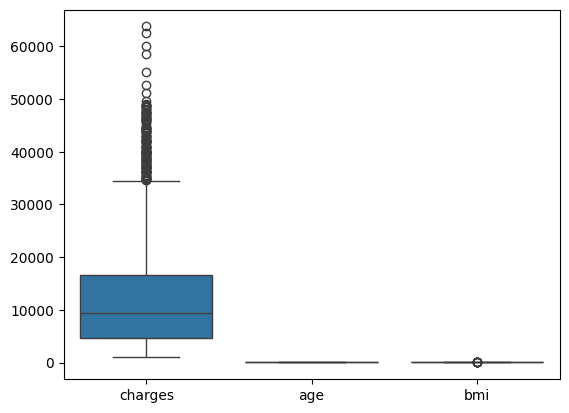

In [15]:
# plot boxplots of df['charges] and df['age']  and df ['bmi] in the same plot
sns.boxplot(data=df[['charges','age','bmi']])

- The top and bottom of the box are the 75th and 25th percentiles, respectively
- The median is shown by the horizontal line in the box
- The whiskers are the two lines outside the box that extend to the highest and lowest observations that are within 1.5 * IQR from the upper and lower quartiles
- Any points outside this range are plotted as individual points
- There are many variations of a boxplot
- By default, the R function extends the whiskers to the furthest point beyond the box, except that it will not go beyond 1.5 times the IQR. Matplotlib uses the same implementation; other software may use a different rule.
- Any data outside of the whiskers is plotted as single points or circles (often considered outliers).
- Pandas provides a number of basic exploratory plots for data frame; one of them is
boxplots


## Frequency Tables and Histograms
- A frequency table of a variable divides up the variable range into equally spaced segments and tells us how many values fall within each segment. 
- The function pandas.cut creates a series that maps the values into the segments.
Using the method value_counts, we get the frequency table

In [16]:
# create frequency table of df['region']
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

╒════╤═══════════╤═════════╕
│    │ Region    │   Count │
╞════╪═══════════╪═════════╡
│  0 │ southeast │     364 │
├────┼───────────┼─────────┤
│  1 │ southwest │     325 │
├────┼───────────┼─────────┤
│  2 │ northwest │     325 │
├────┼───────────┼─────────┤
│  3 │ northeast │     324 │
╘════╧═══════════╧═════════╛


In [20]:
# Alignment of table in centre
from IPython.display import display, HTML

# Create frequency table of df['region']
region = df['region'].value_counts()
region = pd.DataFrame(region)
region.reset_index(inplace=True)
region.columns = ['Region', 'Count']

# Generate the table in fancy_grid format
table = tabulate(region, headers='keys', tablefmt='fancy_grid')

# Display the table centered using HTML
display(HTML(f"<div style='text-align: center;'>{table.replace('\n', '<br>')}</div>"))

In [22]:
# create frequency table of df['charges'] by maping bins
bins = [0,10000,20000,30000,40000,50000]
df['charges_bins'] = pd.cut(df['charges'], bins)
charges_bins = df['charges_bins'].value_counts()
charges_bins = pd.DataFrame(charges_bins)
charges_bins.reset_index(inplace=True)
charges_bins.columns = ['Charges', 'Count']
print(tabulate(charges_bins, headers='keys', tablefmt='fancy_grid'))


╒════╤════════════════╤═════════╕
│    │ Charges        │   Count │
╞════╪════════════════╪═════════╡
│  0 │ (0, 10000]     │     712 │
├────┼────────────────┼─────────┤
│  1 │ (10000, 20000] │     353 │
├────┼────────────────┼─────────┤
│  2 │ (20000, 30000] │     111 │
├────┼────────────────┼─────────┤
│  3 │ (30000, 40000] │      83 │
├────┼────────────────┼─────────┤
│  4 │ (40000, 50000] │      72 │
╘════╧════════════════╧═════════╛


> It is important to include the empty bins; the fact that there are no values
>in those bins is useful information. It can also be useful to experiment with different bin sizes. If they are too large, important features of the distribution can be obscured.If they are too small, the result is too granular, and the ability to see the bigger picture is lost.

> Both frequency tables and percentiles summarize the data by creat‐ing bins. In general, quartiles and deciles will have the same count in each bin (equal-count bins), but the bin sizes will be different. The frequency table, by contrast, will have different counts in the bins (equal-size bins), and the bin sizes will be the same.

A histogram is a way to visualize a frequency table, with bins on the x-axis and the
data count on the y-axis.
Pandas supports histograms for data frames with the DataFrame.plot.hist method.
Use the keyword argument bins to define the number of bins. The various plot meth‐
ods return an axis object that allows further fine-tuning of the visualization using
Matplotlib:

<Axes: xlabel='charges', ylabel='Count'>

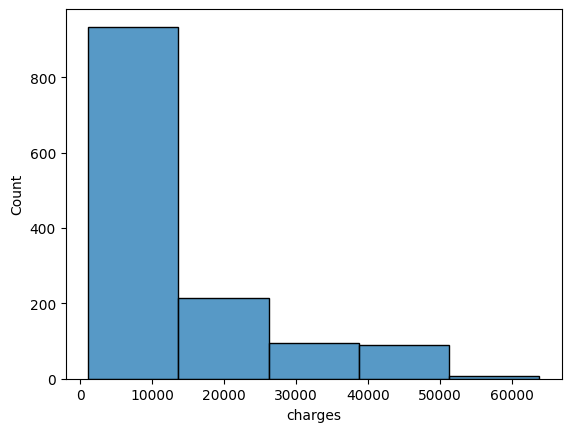

In [24]:
# plot the histogram
sns.histplot(df['charges'], bins=5)



Histograms are plotted such that:

• Empty bins are included in the graph.

• Bins are of equal width.

• The number of bins (or, equivalently, bin size) is up to the user.

• Bars are contiguous—no empty space shows between bars, unless there is an
empty bin.

> Statistical Moments
> In statistical theory, _location_ and _variability_ are referred to as the first and second moments of a **distribution.** The third and fourth moments are called _skewness_ and _kurtosis_. Skewness refers to whether the data is skewed to larger or smaller values, and kurtosis indicates the propensity of the data to have extreme values. Generally, metrics are not used to measure skewness and kurtosis; instead, these are discovered through visual displays

## Density Plots and  Estimates
- Related to the histogram is a density plot, which shows the distribution of data values as a continuous line.
- A density plot can be thought of as a smoothed histogram, although it is typically computed directly from the data through a kernel density estimate 
- pandas provides the density method to create a density plot. Use the argument
bw_method to control the smoothness of the density curve


<Axes: xlabel='charges', ylabel='Density'>

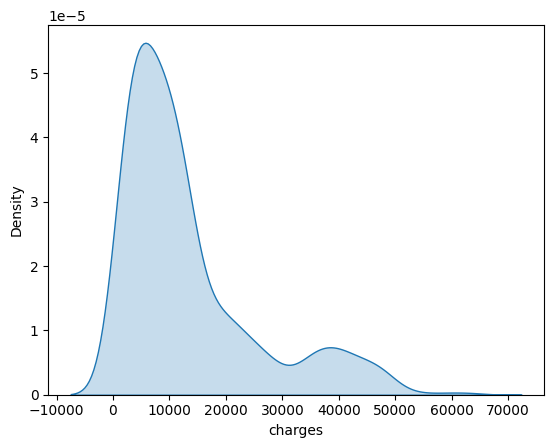

In [26]:
# plot a density plot of df['charges']
sns.kdeplot(df['charges'], fill=True)

A key distinction from the histogram is the scale of the y-axis: a density plot corresponds to plotting the histogram as a proportion rather than counts. Note that the total area under the density curve = 1, and instead of counts in bins you calculate areas under the curve between any two points on the x-axis, which correspond to the proportion of the distribution lying between those two points

> Density Estimation

> Density estimation is a rich topic with a long history in statistical literature. The density estimation methods in pandas and scikit-learn also offer good implementations. For many data science problems, there is no need to worry about the various types of density estimates; it suffices to use the base functions.

## Key Ideas
- A frequency histogram plots frequency counts on the y-axis and variable values
on the x-axis; it gives a sense of the distribution of the data at a glance.
- A frequency table is a tabular version of the frequency counts found in a
histogram.
- A boxplot—with the top and bottom of the box at the 75th and 25th percentiles,
respectively—also gives a quick sense of the distribution of the data; it is often
used in side-by-side displays to compare distributions.
- A density plot is a smoothed version of a histogram; it requires a function to esti‐
mate a plot based on the data (multiple estimates are possible, of course).